<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Assignment6</div>
<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, 001310899 QijiaWang & 001304142 XiaohangZheng</div>

# Analyze NFL Data and predict

Select America football data, and in this data each player has a match player. the ratio between the passing_successful times and pass times means that the player's touching probability. And according to the passing_successful and passing times to predict the probability of player touch.


### Prior probability: refers to the probability obtained from past experience and analysis.

# Import the data and calculcate

In [3]:
import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO  
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

In [4]:
try:
    df_all = pd.read_csv('NFL_Data.csv')
except:
    df_all = pd.read_csv(pm.get_data('NFL_Data.csv'))

In [5]:
df_all

,match_number,Play_Name,Alignment_Name,Passing_successfully,Pass_Loss,Pass_times,Pass_code,Touchdown,Being_intercepted,Being_killed,score
0,1,Andy Dalton,Carson Palmer,35,51,86,418,2,0,5,106.5
1,2,what Prescott,Ryan Fitzpatrick,25,32,57,405,4,0,0,158.3
2,3,Matthew Stafford,Ben Roethlisberger,27,45,72,385,3,0,3,110.0
3,4,Case Keenum,Carson Wentz,30,44,74,380,3,0,1,117.6
4,5,Patrick Mahomes,Joe Flacco,25,33,58,378,3,0,0,143.2
...,...,...,...,...,...,...,...,...,...,...,...
59,60,Derek Carr,Blake Bortles,26,44,70,374,2,0,2,101.9
60,61,Andy Dalton,Alex Smith,28,42,70,348,3,1,4,106.1
61,62,Ben Roethlisberger,Derek Carr,32,46,78,330,3,1,2,102.6
62,63,Andy Dalton,Ben Roethlisberger,22,27,49,306,2,0,3,138.6


# Results table

In [6]:
df_all['success'] = df_all['Passing_successfully'] / df_all['Pass_times']
df_all['game'] = list(zip(df_all['Play_Name'],df_all['Alignment_Name'],df_all['Passing_successfully'] , df_all['Pass_times'],df_all['success']))
df_all['game']

0     (Andy Dalton, Carson Palmer, 35, 86, 0.4069767...
1     (what Prescott, Ryan Fitzpatrick, 25, 57, 0.43...
2     (Matthew Stafford, Ben Roethlisberger, 27, 72,...
3     (Case Keenum, Carson Wentz, 30, 74, 0.40540540...
4     (Patrick Mahomes, Joe Flacco, 25, 58, 0.431034...
                            ...                        
59    (Derek Carr, Blake Bortles, 26, 70, 0.37142857...
60               (Andy Dalton, Alex Smith, 28, 70, 0.4)
61    (Ben Roethlisberger, Derek Carr, 32, 78, 0.410...
62    (Andy Dalton, Ben Roethlisberger, 22, 49, 0.44...
63              (Alex Smith, Derek Carr, 17, 40, 0.425)
Name: game, Length: 64, dtype: object

# Calculate based on ratio
Calculate the data's mean and Standard deviation 

variance

## Standard deviation

<br />
<center>
<img src="Std.png" width=400 />
</center>
<br />

Square root of variance

In [7]:
df_toch_count = df_all.groupby('Play_Name')['success'].count()
df_kill_count = df_all.groupby('Alignment_Name')['success'].count()
df_toch_diff = df_all.groupby('Play_Name')['success'].sum()
df_kill_diff = df_all.groupby('Alignment_Name')['success'].sum()
df_toch_var = df_all.groupby('Play_Name')['success'].var()
df_kill_var = df_all.groupby('Alignment_Name')['success'].var()
df_kill_diff

Alignment_Name
Alex Smith                1.264813
Andy Dalton               0.378788
Austin Davis              0.428571
Ben Roethlisberger        1.191068
Blake Bortles             1.987938
Bosnia and Herzegovina    0.762787
Carson Palmer             0.811739
Carson Wentz              1.210249
Case Keenum               1.193363
Chad Henne                1.189977
Derek Carr                1.207051
Drew Brees                0.765083
Jameis Winston            0.790271
Joe Flacco                1.248546
Josh McCown               0.417910
Kirk Cousins              1.605421
Lamar Jackson             0.891285
Marcus Mariota            0.796846
Matthew Stafford          0.400000
Mike Glennon              0.803775
Nick Foles                0.909459
Patrick Mahomes           0.797101
Philip Rivers             0.669503
Russell Wilson            0.762262
Ryan Fitzpatrick          0.438596
Tom Brady                 1.170554
Trevor Siemian            0.423729
what Prescott             1.229953
Name:

The distribution of a sum of two normally distributed independent variates $X$ and $Y$ with means and variances $(μ_X,σ^2_X)$ and $(μ_Y,σ^2_Y)$, respectively is another normal distribution, with mean $μ_{X+Y} = μ_X + μ_Y$ and variance $σ^2_{X+Y} = σ^2_X + σ^2_Y$. 

We are not sure we have a normal distribution here, but if we take many games into account, by the Central Limit thoerem, we know we do! So we can look at **means** and **standard deviations**.

In [8]:
df_player_mean = (df_toch_diff -df_kill_diff )/(df_kill_count + df_toch_count)
df_player_std = np.sqrt(df_kill_var.fillna(0) + df_toch_var.fillna(0))/(df_toch_count + df_kill_count)
df_player_mean

Alex Smith                0.051635
Andy Dalton               0.295910
Austin Davis             -0.016755
Ben Roethlisberger        0.057899
Blake Bortles            -0.004189
Bosnia and Herzegovina   -0.127451
Carson Palmer            -0.132215
Carson Wentz              0.107530
Case Keenum              -0.196989
Chad Henne               -0.086173
Derek Carr                0.049619
Drew Brees               -0.112805
Jameis Winston           -0.123073
Joe Flacco               -0.220225
Josh McCown               0.169427
Kirk Cousins             -0.057185
Lamar Jackson            -0.006104
Marcus Mariota            0.000723
Matthew Stafford          0.131667
Mike Glennon             -0.137295
Nick Foles               -0.170675
Patrick Mahomes           0.078688
Philip Rivers            -0.081925
Russell Wilson           -0.117724
Ryan Fitzpatrick         -0.029904
Tom Brady                 0.047737
Trevor Siemian            0.125424
Tyrod Taylor                   NaN
what Prescott       

# According to the data's mean and std,  plot the relationship between Pass success rate and the probability of touching

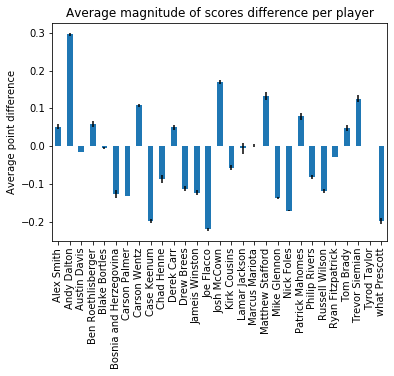

In [9]:
(df_player_mean

      .plot(kind='bar', title='Average magnitude of scores difference per player', yerr=df_player_std)
      .set_ylabel('Average point difference'));

# Conclusion

## The greater mean leads the greater success rate. The greater success rate leads the greater probability of touching. 

In the plot, Andy Dalton's probability of touching is the highest, about 30%

# Building a Bayesian Model

<div style="text-align: right; color: gray"></div>


##### Prior information + overall distribution information + sample information → posterior distribution information


We know that a count outcome is most often modelled as a Poisson distribution. Modeling player strengths is usually accomplished with a vector of touchdown $y=(y_1,y_2)$ as independent Poisson distributions: $(y_i\;|\;θ_j) \propto Poisson(θ_j)$ where the $\theta_j$ parameters represent the player touching times.



<br />
<center>
<img src="Poisson.png" width=400 />
</center>
<br />


We will model $\theta$ as an exponential of two independent variables: an attack variable **att**, and a defense variable **def**, times a constant factor k:

$$θ = k * e^{\text{att}_g} * e^{\text{def}_g}$$

We use an exponential to increase the effect of each indendent variable.

So we will use $log(\theta)$ to simplify calculations.

Since the player has an advantage, these parameters are initially modeled with a log-linear random effect model, a standard procedure in sports analytics, and what we saw in class (except we take the **log**, and we have **discrete variables** rather than **continuous variables**).

$$\log(θ_1) = \text{player} + \text{att}_g + \text{def}_g \\
\log(θ_2) = \text{att}_g + \text{def}_g$$

The parameter `player` (the **intercept**) represents the *bias*: An advantage for the player touching, constant for all players. 

The touching intensity is determined jointly by an attack and a defense ability for each player, represented by parameters `att` and `def`, respectively

For each player $t = 1, \cdots, T$, player-specific attack and defense effects are modelled from a common normal distribution:
$att_t \propto \text{Normal}(μ_{att},τ_{att})$ and $def_t \propto \text{Normal}(μ_{def}, τ_{def})$.

Build a simple model in `PyMC3`, specifying global parameters, player-specific parameters, and the likelihood function.

# Extract relevant data for forecasting

In [10]:
df = df_all[['Play_Name','Alignment_Name','Passing_successfully','Pass_Loss']]
df.head()

,Play_Name,Alignment_Name,Passing_successfully,Pass_Loss
0,Andy Dalton,Carson Palmer,35,51
1,what Prescott,Ryan Fitzpatrick,25,32
2,Matthew Stafford,Ben Roethlisberger,27,45
3,Case Keenum,Carson Wentz,30,44
4,Patrick Mahomes,Joe Flacco,25,33


# List all players and number them according to the Player_name

In [11]:
Players = df['Play_Name'].unique()
Players = pd.DataFrame(Players, columns=['Name'])
Players['i'] = Players.index
Players

,Name,i
0,Andy Dalton,0
1,what Prescott,1
2,Matthew Stafford,2
3,Case Keenum,3
4,Patrick Mahomes,4
5,Drew Brees,5
6,Tom Brady,6
7,Philip Rivers,7
8,Lamar Jackson,8
9,Carson Wentz,9


# Using i_toch and i_kill to mean every Play_name and Alignment_name and forming the numpy array. And these arrays will calculate in the model.

In [12]:
df = pd.merge(df, Players, left_on='Play_Name', right_on='Name', how='left')
df = df.rename(columns = {'i': 'i_toch'}).drop('Name', 1)
df = pd.merge(df, Players, left_on='Alignment_Name', right_on='Name', how='left')
df = df.rename(columns = {'i': 'i_kill'}).drop('Name', 1)
df.head()

,Play_Name,Alignment_Name,Passing_successfully,Pass_Loss,i_toch,i_kill
0,Andy Dalton,Carson Palmer,35,51,0,21
1,what Prescott,Ryan Fitzpatrick,25,32,1,20
2,Matthew Stafford,Ben Roethlisberger,27,45,2,22
3,Case Keenum,Carson Wentz,30,44,3,9
4,Patrick Mahomes,Joe Flacco,25,33,4,23


In [13]:
observed_toch_goals = df['Passing_successfully'].values
observed_loss_goals = df['Pass_Loss'].values

toch = df['i_toch'].values
kill = df['i_kill'].values

num_Players = len(Players)
num_toch = len(toch)
num_Players, num_toch

(29, 64)

In [14]:
toch

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,
       16,  2,  9,  4,  6,  6, 17,  8, 18, 10, 15, 12, 19, 14, 14, 20, 21,
        9, 22,  6, 23, 17, 24, 18, 25, 15, 26, 19, 27, 28, 14,  0,  4, 22,
       24,  9, 12, 10, 14,  0,  9, 22, 10,  0, 22,  0, 12])

In [15]:
kill

array([21, 20, 22,  9, 23,  6, 24, 17, 25, 18, 26, 15, 27, 19, 14, 28,  1,
       21,  3, 22,  5, 23,  7, 24,  9, 25, 11, 26, 13, 27, 15, 14,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  3,  6,  1,
       23, 15, 14,  8, 19,  4, 12, 24, 14, 12, 10, 22, 10])

In [16]:
observed_toch_goals

array([35, 25, 27, 30, 25, 32, 24, 25, 17, 28, 29, 32, 25, 27, 18, 30, 20,
       17, 21, 29, 31, 25, 25, 23, 22, 18, 25, 17, 20, 26, 17, 27, 25, 22,
       28, 26, 26, 25, 21, 10, 10, 31, 29, 35, 28, 29, 32, 30, 23, 21, 28,
       29, 29, 32, 22, 19, 29, 28, 29, 26, 28, 32, 22, 17])

# Calculcate priors for the att and def parameters for each player.

In [18]:
g1 = df.groupby('i_kill')
att_starting_points = np.log(g1['Pass_Loss'].mean())
g2 = df.groupby('i_toch')
def_starting_points = -np.log(g2['Passing_successfully'].mean())
def_starting_points

i_toch
0    -3.264486
1    -3.218876
2    -3.178054
3    -3.401197
4    -3.245193
5    -3.465736
6    -3.218876
7    -3.218876
8    -2.970414
9    -3.346389
10   -3.238678
11   -3.465736
12   -3.157000
13   -3.295837
14   -3.100092
15   -3.232121
16   -2.833213
17   -3.091042
18   -2.639057
19   -3.295837
20   -3.218876
21   -3.091042
22   -3.358638
23   -3.218876
24   -2.970414
25   -3.433987
26   -3.555348
27   -3.367296
28   -3.465736
Name: Passing_successfully, dtype: float64

## After getting our priors, now building the model and likelihood function in pymc3.

If you are modeling the distribution of a *large* population, then use the **normal distribution**. If you are modeling the mean of the population when the population size is small, better to use the t-distribution, also called the **student-t distribution**.

The student-t distribution has higher kurtosis (4th *moment*) than the normal distribution. That means that data from the t-distribution will have a tendency to appear closer or farther from the mean than typical normal data. In other words, the t-distribution is more *fat-tailed* and captures outliers ***better***: The probability of obtaining values far from the mean is larger than with the normal distribution.

As the number of degrees of freedom of data increases, the t-distribution becomes closer to the normal distribution. The t-distribution is used a lot in fintech.

The shape of the probability density function of T is similar to a normal distribution with a mean of 0 variance, but lower and wider. As the degree of freedom increases, it is getting closer to a normal distribution with a mean of 0 and a variance of 1.

<br />
<center>
<img src="change.png" width=400 />
</center>
<br />

T-distribution feature：

1.a single-peak distribution symmetrically centered on 0;

2.The t distribution is a cluster of curves whose morphological changes are related to the magnitude of n (exactly with the degree of freedom df). The smaller the degree of freedom df, the lower the t-distribution curve; the larger the degree of freedom df, the closer the t-distribution curve is to the standard normal distribution (u-distribution) curve, as shown in the figure:The distribution of t(n) and the density function of the standard normal N(0,1).

3.As the degree of freedom increases, the t-distribution gradually approaches the standard normal distribution.

The **half-t distribution** (also denoted **folded-t**) is derived from the t-distribution by taking the absolute values of variates. Since we already know the sign of `att` and `def` parameters, we don't want any negative signs.

<br />
<center>
<img src="Student-T-distribution.png" width=400 />
</center>
<br />

Since we have a linear model for log$\theta$, we have a *slope-intercept* formula: $y = mx + b$ where $m$ is the slope or the consistent change between $x$ and $y$, and $b$ is the y-intercept (intercepts the y-axis at $y = b$). It is the expected mean value of $y$ when $x = 0$.

$$\log(θ_1) = \text{player} + \text{att}_g + \text{def}_g \\
\log(θ_2) = \text{att}_g + \text{def}_g$$

$$\text{posterior} = \dfrac{\text{likelihood * prior}}{\text{marginal likelihood}}$$

In [19]:
with pm.Model() as model:
    # global model priors: standard deviation and intercept.
    # We are saying that the standard deviation and intercept priors of each
    # player's att and def parameters stem from the same folded-t distribution.
    player = pm.Flat('player')
    sd_att = pm.HalfStudentT('sd_att', nu=3, sd=2.5)
    sd_def = pm.HalfStudentT('sd_def', nu=3, sd=2.5)
    intercept = pm.Flat('intercept') 

    # player-specific model parameters. There is one (atts_star, defs_star) tuple per player.
    # Note use of normal distribution because we assume we have a lot of data per player
    atts_star = pm.Normal("atts_star", mu=0, sd=sd_att, shape=num_Players)
    defs_star = pm.Normal("defs_star", mu=0, sd=sd_def, shape=num_Players)

    # To allow samples of expressions to be saved, we need to wrap them in pymc3 Deterministic objects
    # We save these parameters for later exploration.
    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    
    # Assume exponential search on home_theta and away_theta. With pymc3, need to rely on theano.
    # tt is theano.tensor.. why Sampyl may be easier to use.. the tensflower's predecessor
    toch_theta = tt.exp(intercept + player + atts[toch] + defs[kill])  
    kill_theta = tt.exp(intercept + atts[kill] + defs[toch])

    # likelihood of observed data, Poisson distribution for coutn data, always!
    toch_points = pm.Poisson('toch_points', mu=toch_theta, observed=observed_toch_goals)
    kill_points = pm.Poisson('kill_points', mu=kill_theta, observed=observed_loss_goals)

A *trace* is an MCMC sampling of your posterior probability distribution. It yields the parameters of your model (`att` and `def` per player, for a log-linear model) that are most likely to fit your observations. We won't specify an algorithm; pymc3 will most likely choose NUTS.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [defs_star, atts_star, intercept, sd_def, sd_att, player]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:06<00:00, 580.95draws/s]
The number of effective samples is smaller than 25% for some parameters.
//anaconda3/lib/python3.7/site-packages/arviz/plots/traceplot.py:155: SyntaxWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (120), generating only 40 plots
  SyntaxWarning,


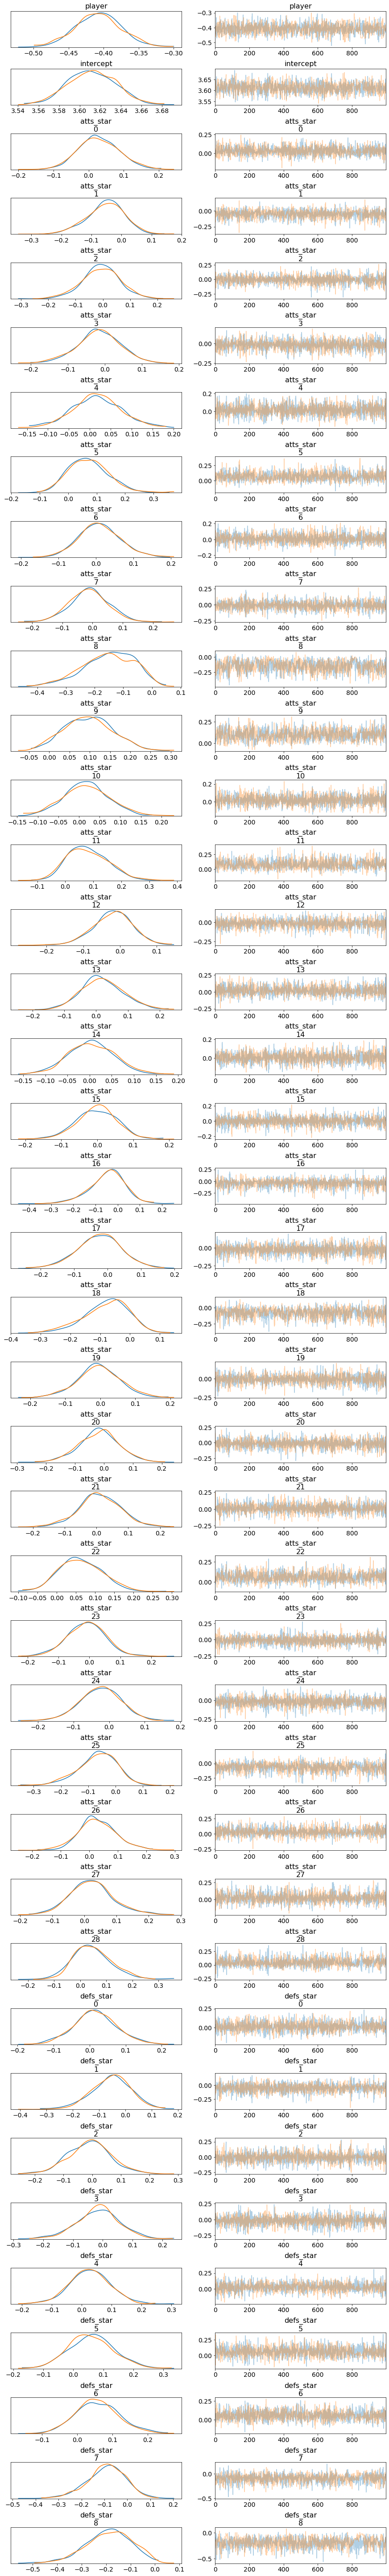

In [20]:
with model:
    trace = pm.sample(1000, tune=1000, cores=2)
    pm.traceplot(trace)

# get posterior probability distribution

### Posterior Probability: Things have already happened. The reason for asking this to happen is the size of the possibility caused by a certain factor.

The **Bayesian** ： Prior information + overall distribution information + sample information → posterior distribution information

The **highest posterior density interval** (HDI) is the interval which contains the required point estimate such that all points within the interval have a higher probability density than points outside the interval. The HDI is the narrowest interval containing the specified point estimate. In `pymc3`, you get it with `stats.hpd`.

**Quantiles** are sets of values of a variate that divide a frequency distribution into equal groups, each containing the same fraction of the total population. 

In [21]:
pm.stats.hpd(trace['atts'])

array([[-0.07508856,  0.14459873],
       [-0.1690296 ,  0.06632804],
       [-0.14444087,  0.11948111],
       [-0.13600324,  0.09283854],
       [-0.10755115,  0.1272578 ],
       [-0.04595293,  0.21081429],
       [-0.0878521 ,  0.12517843],
       [-0.12994459,  0.11114152],
       [-0.31873261,  0.00452068],
       [-0.01197974,  0.21520721],
       [-0.09151679,  0.12216273],
       [-0.04802214,  0.21817171],
       [-0.12979068,  0.07708346],
       [-0.09132087,  0.16962797],
       [-0.09386001,  0.10159753],
       [-0.12088251,  0.09144305],
       [-0.23592397,  0.08799901],
       [-0.15854814,  0.09841067],
       [-0.22524517,  0.06063311],
       [-0.12120367,  0.12017618],
       [-0.15829123,  0.11689401],
       [-0.12379885,  0.13805491],
       [-0.03732463,  0.17125424],
       [-0.13959868,  0.10039656],
       [-0.13706158,  0.08750325],
       [-0.21805021,  0.05637777],
       [-0.08672938,  0.17059692],
       [-0.1061253 ,  0.16245972],
       [-0.08280668,

In [22]:
pm.stats.quantiles(trace['atts'])

{2.5: array([-0.07744326, -0.18331272, -0.14176148, -0.13581174, -0.09949238,
        -0.04493061, -0.09119479, -0.13285884, -0.33769139, -0.00939952,
        -0.08581086, -0.0389311 , -0.1285267 , -0.10230886, -0.09491771,
        -0.11100905, -0.23135538, -0.15707668, -0.24345434, -0.12883723,
        -0.15882615, -0.12061834, -0.03637904, -0.13116261, -0.14209227,
        -0.21573724, -0.09113561, -0.10383484, -0.08000946]),
 25: array([-0.00875092, -0.0906866 , -0.04762151, -0.05128322, -0.01961967,
         0.02317913, -0.02305221, -0.05065019, -0.2106834 ,  0.05538141,
        -0.01825565,  0.02892944, -0.05081739, -0.02362742, -0.02871819,
        -0.0365086 , -0.09273786, -0.06420476, -0.12573188, -0.04104061,
        -0.05768763, -0.02873298,  0.02442087, -0.04691547, -0.0604396 ,
        -0.10746217, -0.00977694, -0.02011451, -0.0015168 ]),
 50: array([ 0.02878958, -0.04911611, -0.00399445, -0.01682726,  0.01609164,
         0.0667149 ,  0.00858696, -0.00951197, -0.14524408, 

# Plot atts and defs posterior 

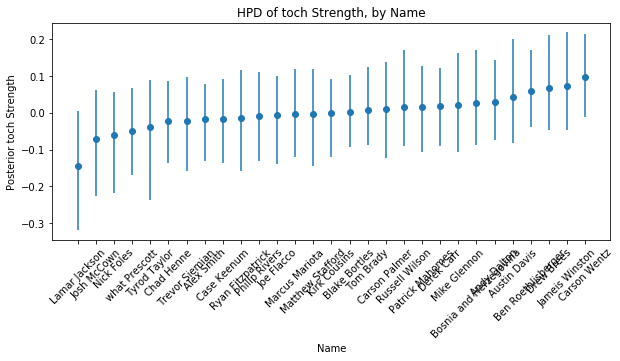

In [23]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['atts']),
                      columns=['hpd_low', 'hpd_high'],
                      index=Players.Name.values)
df_median = pd.DataFrame(pm.stats.quantiles(trace['atts'])[50],
                         columns=['hpd_median'],
                         index=Players.Name.values)
df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(10,4))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('HPD of toch Strength, by Name')
axs.set_xlabel('Name')
axs.set_ylabel('Posterior toch Strength')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=45)

### conclusion
Carson wentz's attack ability is the best in the 29 players.

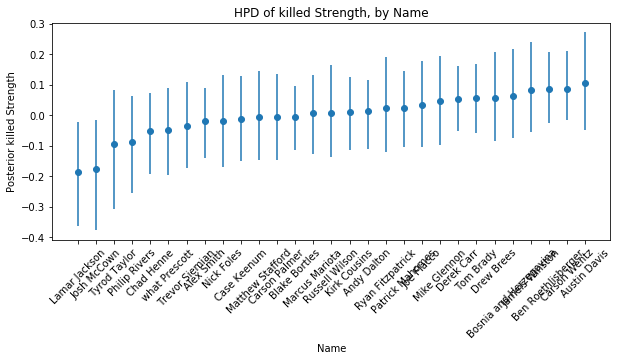

In [24]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['defs']),
                      columns=['hpd_low', 'hpd_high'],
                      index=Players.Name.values)
df_median = pd.DataFrame(pm.stats.quantiles(trace['defs'])[50],
                         columns=['hpd_median'],
                         index=Players.Name.values)
df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(10,4))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('HPD of killed Strength, by Name')
axs.set_xlabel('Name')
axs.set_ylabel('Posterior killed Strength')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=45)

# conclusion
Austin Davis's defense ability is the best in the 29 players.

In [25]:
Players.T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Name,Andy Dalton,what Prescott,Matthew Stafford,Case Keenum,Patrick Mahomes,Drew Brees,Tom Brady,Philip Rivers,Lamar Jackson,Carson Wentz,...,Marcus Mariota,Ryan Fitzpatrick,Carson Palmer,Ben Roethlisberger,Joe Flacco,Chad Henne,Nick Foles,Bosnia and Herzegovina,Mike Glennon,Austin Davis
i,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28


//anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


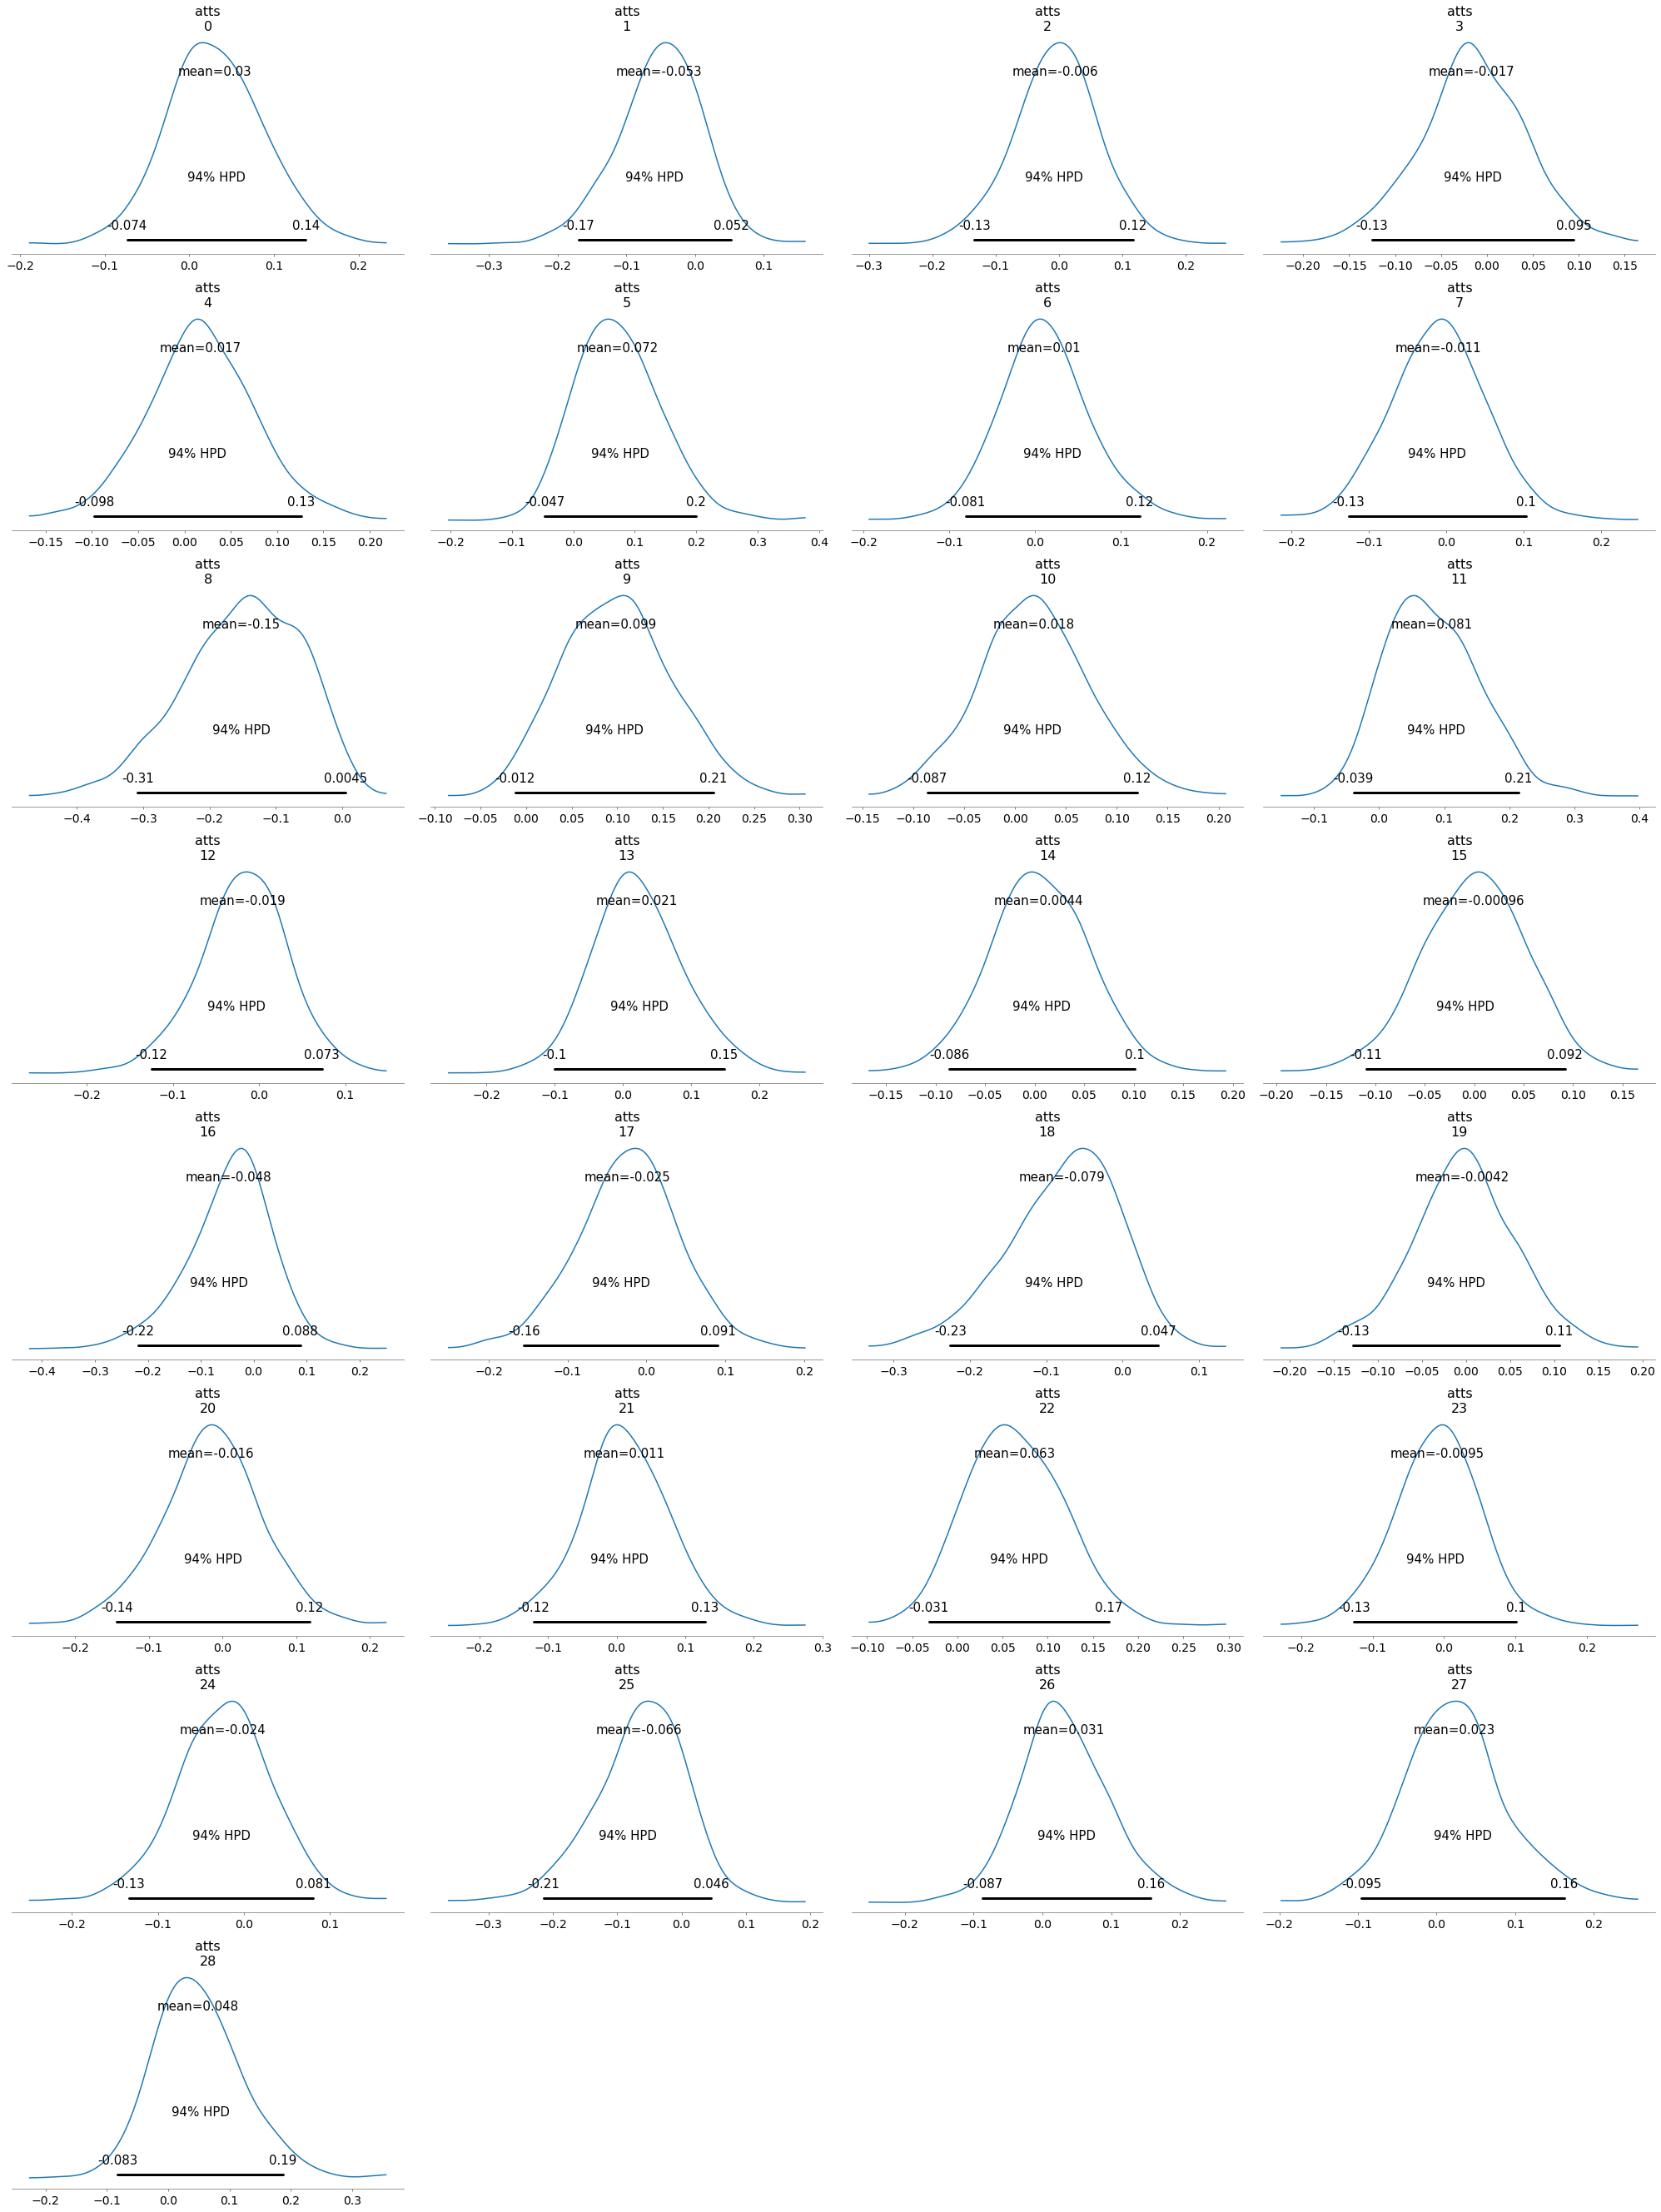

In [26]:
pm.plot_posterior(trace, varnames=['atts']);


## Predicting the future with Posterior Predictive Checks

**Posterior predictive checks** (PPCs) are a great way to validate a model. The idea is to generate data from the model using parameters from draws from the posterior.

PPCs can help analyze the degree to which data generated from the model deviate from data generated from the true distribution. Visualizing the PPC is a great ‘sense check’ of your model. In `pymc3`, it's done with `sample_ppc()` of your trace.

In [27]:
with model:
    pp_trace = pm.sample_ppc(trace)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  
100%|██████████| 2000/2000 [00:02<00:00, 796.04it/s]


# use y=mx (m=3) model to perdict

In [28]:
torch_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * play_toch 
        for i, play_toch in enumerate(pp_trace['toch_points'] > pp_trace['kill_points'])
})
torch_sim_df.insert(0, 'Name', df['Play_Name'])

loss_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * Alignment_kill 
        for i, Alignment_kill in enumerate(pp_trace['toch_points'] < pp_trace['kill_points'])
})
loss_sim_df.insert(0, 'Name', df['Alignment_Name'])

In [29]:
sim_table = (torch_sim_df.groupby('Name')
                        .sum()
                        .add(loss_sim_df.groupby('Name').sum())
                        .rank(ascending=False, method='min', axis=0)
                        .reset_index()
                        .melt(id_vars='Name', value_name='rank')
                        .groupby('Name')
                        ['rank']
                        .value_counts()
                        .unstack(level='rank')
                        .fillna(0)
                        .div(1000))

In [30]:
sim_table

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
Name,,,,,,,,,,,,,,,,,,,,,
Alex Smith,0.116,0.340,0.517,0.469,0.184,0.032,0.004,0.010,0.032,0.083,...,0.001,0.004,0.009,0.009,0.007,0.002,0.000,0.000,0.001,0.003
Andy Dalton,0.006,0.020,0.041,0.051,0.021,0.004,0.000,0.016,0.059,0.151,...,0.036,0.123,0.287,0.394,0.304,0.061,0.011,0.007,0.022,0.054
Austin Davis,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.005,0.018,...,0.044,0.151,0.351,0.541,0.454,0.138,0.025,0.023,0.071,0.117
Ben Roethlisberger,0.064,0.287,0.498,0.486,0.194,0.041,0.006,0.017,0.040,0.118,...,0.002,0.004,0.011,0.021,0.010,0.002,0.001,0.000,0.001,0.000
Blake Bortles,1.826,0.131,0.020,0.014,0.005,0.002,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Bosnia and Herzegovina,0.000,0.002,0.025,0.022,0.018,0.005,0.000,0.026,0.106,0.338,...,0.017,0.050,0.083,0.075,0.028,0.004,0.004,0.001,0.006,0.014
Carson Palmer,0.000,0.011,0.041,0.057,0.038,0.003,0.000,0.029,0.098,0.297,...,0.033,0.048,0.112,0.093,0.043,0.006,0.002,0.001,0.011,0.014
Carson Wentz,0.099,0.353,0.499,0.470,0.183,0.039,0.003,0.006,0.031,0.073,...,0.003,0.006,0.014,0.010,0.010,0.001,0.000,0.001,0.001,0.003
Case Keenum,0.011,0.166,0.485,0.584,0.264,0.057,0.006,0.018,0.050,0.111,...,0.001,0.007,0.019,0.015,0.007,0.003,0.000,0.002,0.002,0.001


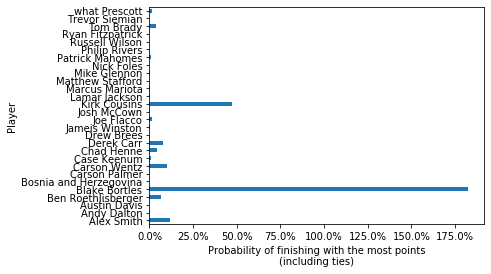

In [31]:
ax = sim_table.loc[:,1].plot(kind='barh')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'));
ax.set_xlabel("Probability of finishing with the most points\n(including ties)");

ax.set_ylabel("Player");

### Conclusion

### Blake Bortles's probability of  touchdown is more than 100%. Kirk Cousins's probability is more than 50%, and most players' probability is lower than 25%. About 17 players' probability of touchdown is 0.

# use y=mx+b (m=3, b=-1) model to perdict

In [32]:
torch_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * play_toch - 1
        for i, play_toch in enumerate(pp_trace['toch_points'] > pp_trace['kill_points'])
})
torch_sim_df.insert(0, 'Name', df['Play_Name'])

loss_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * Alignment_kill - 1
        for i, Alignment_kill in enumerate(pp_trace['toch_points'] < pp_trace['kill_points'])
})
loss_sim_df.insert(0, 'Name', df['Alignment_Name'])

In [33]:
sim_table = (torch_sim_df.groupby('Name')
                        .sum()
                        .add(loss_sim_df.groupby('Name').sum())
                        .rank(ascending=False, method='min', axis=0)
                        .reset_index()
                        .melt(id_vars='Name', value_name='rank')
                        .groupby('Name')
                        ['rank']
                        .value_counts()
                        .unstack(level='rank')
                        .fillna(0)
                        .div(1000))

In [34]:
sim_table

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
Name,,,,,,,,,,,,,,,,,,,,,
Alex Smith,0.134,0.142,0.108,0.030,0.013,0.001,0.000,0.000,0.000,0.001,...,0.000,0.000,0.002,0.008,0.017,0.048,0.085,0.104,0.047,0.026
Andy Dalton,0.012,0.010,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.002,...,0.000,0.000,0.000,0.006,0.032,0.082,0.145,0.173,0.245,1.174
Austin Davis,0.000,0.000,0.000,0.001,0.019,0.028,0.023,0.003,0.000,0.000,...,0.450,0.485,0.259,0.052,0.008,0.006,0.030,0.075,0.080,0.020
Ben Roethlisberger,0.107,0.102,0.083,0.022,0.004,0.001,0.000,0.000,0.000,0.004,...,0.000,0.000,0.001,0.006,0.035,0.067,0.107,0.112,0.067,0.028
Blake Bortles,0.765,0.503,0.307,0.088,0.026,0.001,0.001,0.000,0.000,0.003,...,0.000,0.000,0.001,0.001,0.003,0.007,0.010,0.009,0.007,0.001
Bosnia and Herzegovina,0.029,0.025,0.015,0.012,0.065,0.234,0.435,0.505,0.279,0.097,...,0.015,0.038,0.047,0.074,0.064,0.018,0.002,0.004,0.011,0.006
Carson Palmer,0.065,0.061,0.020,0.015,0.054,0.204,0.378,0.459,0.262,0.094,...,0.019,0.050,0.072,0.107,0.063,0.017,0.004,0.003,0.011,0.013
Carson Wentz,0.045,0.020,0.007,0.015,0.061,0.129,0.099,0.045,0.007,0.002,...,0.338,0.330,0.164,0.030,0.001,0.005,0.027,0.106,0.126,0.090
Case Keenum,0.478,0.573,0.366,0.124,0.028,0.002,0.003,0.000,0.000,0.003,...,0.000,0.000,0.000,0.000,0.005,0.011,0.016,0.014,0.009,0.002


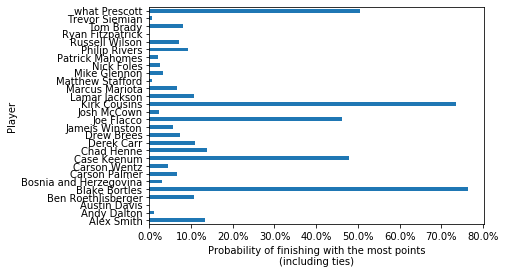

In [35]:
ax = sim_table.loc[:,1].plot(kind='barh')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'));
ax.set_xlabel("Probability of finishing with the most points\n(including ties)");

ax.set_ylabel("Player");

## Conclusion

### Blake Bortles and Kirk Cousins 's touchdown probability is the highest among the 29 players

## Covariate exploration
Let's finish with some covariates exploration. The covariates here are the team-specific attackand defense strenth parameters as MCMC-sampled from their posterior distribution. 

In [36]:
df_trace = pm.trace_to_dataframe(trace)

In [37]:
Players.T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Name,Andy Dalton,what Prescott,Matthew Stafford,Case Keenum,Patrick Mahomes,Drew Brees,Tom Brady,Philip Rivers,Lamar Jackson,Carson Wentz,...,Marcus Mariota,Ryan Fitzpatrick,Carson Palmer,Ben Roethlisberger,Joe Flacco,Chad Henne,Nick Foles,Bosnia and Herzegovina,Mike Glennon,Austin Davis
i,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28


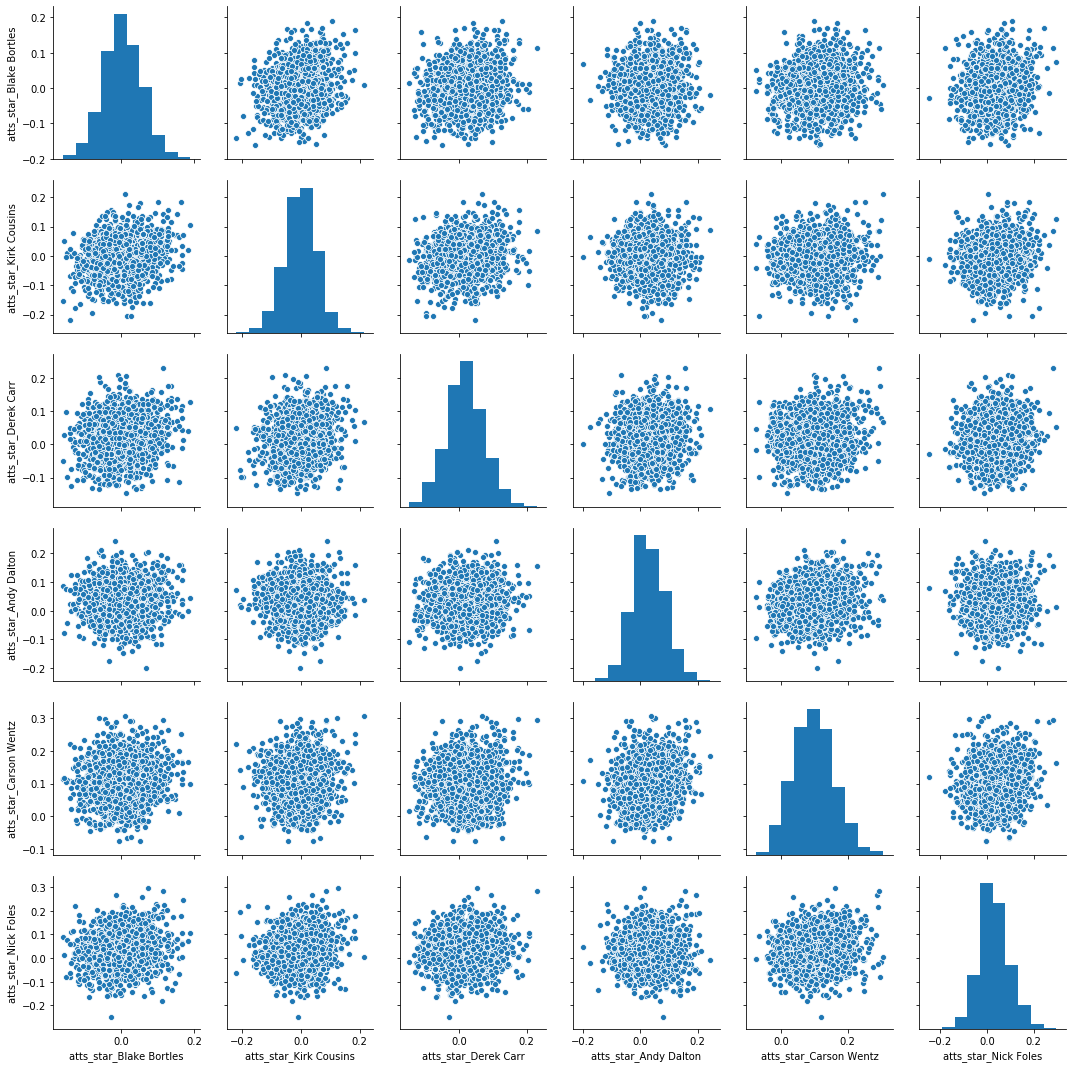

In [38]:
import seaborn as sns

cols = {
    'atts_star__14': 'atts_star_Blake Bortles',
    'atts_star__15': 'atts_star_Kirk Cousins',
    'atts_star__10': 'atts_star_Derek Carr',
    'atts_star__0': 'atts_star_Andy Dalton',
    'atts_star__9': 'atts_star_Carson Wentz',
    'atts_star__26': 'atts_star_Nick Foles'
}

df_trace_att = df_trace[list(cols)].rename(columns=cols)
_ = sns.pairplot(df_trace_att)

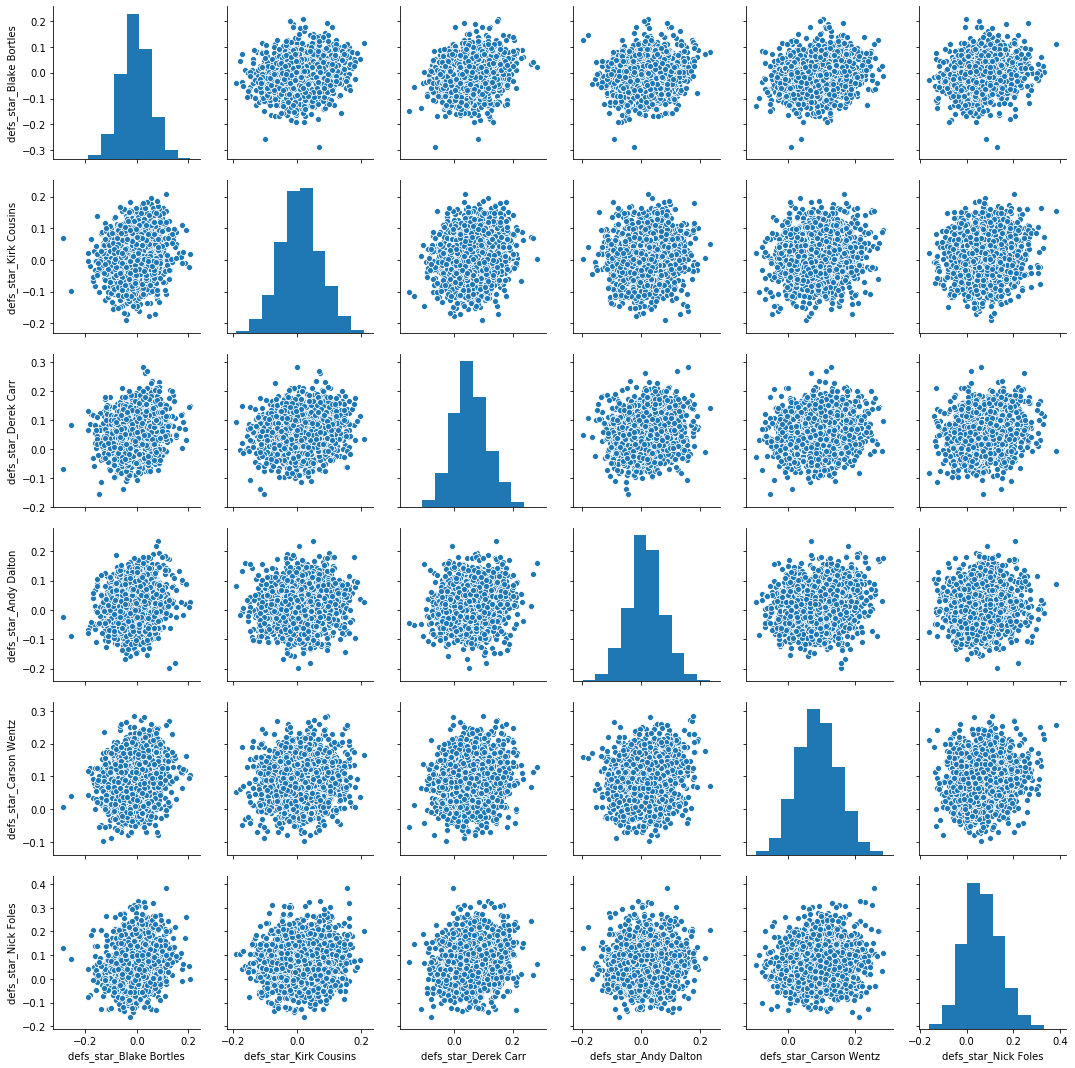

In [39]:
import seaborn as sns

cols = {
    'defs_star__14': 'defs_star_Blake Bortles',
    'defs_star__15': 'defs_star_Kirk Cousins',
    'defs_star__10': 'defs_star_Derek Carr',
    'defs_star__0': 'defs_star_Andy Dalton',
    'defs_star__9': 'defs_star_Carson Wentz',
    'defs_star__26': 'defs_star_Nick Foles'
}

df_trace_def = df_trace[list(cols)].rename(columns=cols)
_ = sns.pairplot(df_trace_def)

# Conculsion 

### According to the result, I found that the model y=3x-1 can predict an ideal result. Blake Bortles and Kirk Cousins 's touchdown probability is the largest among the 29 players, about 80%. And Asutin Davids is the least likely to have a touchdown.